In [1]:
import pandas as pd
import numpy as np

xls = pd.ExcelFile('C:\\Users\\Orakzai\\OneDrive - University of Essex\\Micorwave Imaging\\data1.xlsx')
s11_data = pd.read_excel(xls, 'S11')
s21_data = pd.read_excel(xls, 'S21')

print(s21_data)




     Frequency  No CSF S21  No CSF Phase  22.6 mm^3 S21  22.6 mm^3 Phase  \
0     0.000300  -39.207308    -25.571311     -39.036216       -21.805042   
1     0.015298  -33.613815     80.263794     -32.436513        99.847778   
2     0.030297  -30.302544    112.430360     -25.874168       152.296912   
3     0.045296  -32.256568    115.919748     -21.617745       120.772737   
4     0.060294  -37.809193    150.220353     -31.048380      -174.957721   
..         ...         ...           ...            ...              ...   
196   2.940006  -30.381870    101.442013     -29.963146       106.509555   
197   2.955004  -29.519628     99.175259     -28.958918       100.443583   
198   2.970003  -29.060743     99.066634     -28.934105        92.222804   
199   2.985002  -27.873346     96.888115     -29.137801        87.213854   
200   3.000000  -27.295275     89.686138     -28.990723        80.632775   

     56.5 mm^3 S21  56.5 mm^3 Phase  113 mm^3 S21  113 mm^3 Phase  \
0       -39.030871

In [2]:
pwd

'C:\\Users\\Orakzai\\OneDrive - University of Essex\\Micorwave Imaging'

## Data Preparation Steps:
1. Consolidate Measurements: For each condition (e.g., No CSF, 22.6 mm^3), consolidate the S11 and S21 measurements into a single structure. This might mean creating a combined data frame for each condition, where each row represents a frequency point, and columns include both S11 and S21 magnitude and phase information.


2. Normalize Data: If not already normalized, normalize the magnitude and phase data to ensure consistent scale across different measurements. This step is crucial for meaningful comparison and analysi

   
4. Label Data: Assign labels to each data point or segment based on the condition it represents, which corresponds to different stages of Alzheimer's Disease severity. This will be necessary for supervised learning models used in classification

In [4]:
# Assuming s11_data and s21_data are already loaded as shown in your previous code snippets

# Create a new DataFrame to hold the merged data for 'No CSF' condition as an example
# This can be replicated for other conditions by following a similar approach

# Extract 'No CSF' columns from both S11 and S21 datasets
no_csf_s11 = s11_data[['Frequency', 'No CSF S11', 'No CSF Phase']]
no_csf_s21 = s21_data[['Frequency', 'No CSF S21', 'No CSF Phase']]

# Merging the 'No CSF' S11 and S21 data on 'Frequency'
# Note: Adjust column names as necessary based on your actual data
no_csf_merged = pd.merge(no_csf_s11, no_csf_s21, on='Frequency', suffixes=('_S11', '_S21'))

# Display the merged 'No CSF' data
print(no_csf_merged.head())



   Frequency  No CSF S11  No CSF Phase_S11  No CSF S21  No CSF Phase_S21
0   0.000300   -0.101311          0.060148  -39.207308        -25.571311
1   0.015298   -0.051645         -3.102555  -33.613815         80.263794
2   0.030297   -0.095911         -6.027420  -30.302544        112.430360
3   0.045296   -0.021948         -8.714174  -32.256568        115.919748
4   0.060294    0.245287        -11.801988  -37.809193        150.220353


In [12]:
# Saving merged data 
import pandas as pd

# Assuming s11_data and s21_data are defined earlier in your script

conditions = ['No CSF', '22.6 mm^3', '56.5 mm^3', '113 mm^3', '226 mm^3']
merged_conditions = {}

for condition in conditions:
    # Extracting S11 data for the current condition
    s11_columns = ['Frequency', f'{condition} S11', f'{condition} Phase']
    s11_condition_data = s11_data[s11_columns].rename(columns={f'{condition} S11': f'{condition} S11 Magnitude', f'{condition} Phase': f'{condition} S11 Phase'})
    
    # Extracting S21 data for the current condition
    s21_columns = ['Frequency', f'{condition} S21', f'{condition} Phase']
    s21_condition_data = s21_data[s21_columns].rename(columns={f'{condition} S21': f'{condition} S21 Magnitude', f'{condition} Phase': f'{condition} S21 Phase'})
    
    # Merging S11 and S21 data on 'Frequency' for the current condition
    merged_data = pd.merge(s11_condition_data, s21_condition_data, on='Frequency')
    merged_conditions[condition] = merged_data

# Now, to save the merged_conditions data to an Excel file
with pd.ExcelWriter('merged_conditions.xlsx') as writer:
    for condition, df in merged_conditions.items():
        # The sheet name must be a string and <= 31 characters
        sheet_name = condition[:31]
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# This will create an Excel file named 'merged_conditions.xlsx' with each condition as a separate sheet.


In [4]:
#reading the data 
merged_data = pd.ExcelFile('C:\\Users\\Orakzai\\OneDrive - University of Essex\\Micorwave Imaging\\merged_conditions.xlsx')
Healthy = pd.read_excel(merged_data, 'No CSF')
Mild = pd.read_excel(merged_data, '22.6 mm^3')
Moderate = pd.read_excel(merged_data, '56.5 mm^3')
Severe = pd.read_excel(merged_data, '113 mm^3')
Extreme = pd.read_excel(merged_data, '226 mm^3')

print(Mild)


     Frequency  22.6 mm^3 S11 Magnitude  22.6 mm^3 S11 Phase  \
0     0.000300                -0.070797             0.017630   
1     0.015298                -0.124847            -3.503749   
2     0.030297                -0.419092            -8.738908   
3     0.045296                -1.363038            -7.137197   
4     0.060294                 0.032581           -11.817602   
..         ...                      ...                  ...   
196   2.940006               -13.055514           -64.567843   
197   2.955004               -13.167910           -67.715801   
198   2.970003               -13.507048           -72.048784   
199   2.985002               -13.993642           -75.492786   
200   3.000000               -14.433613           -78.267316   

     22.6 mm^3 S21 Magnitude  22.6 mm^3 S21 Phase  
0                 -39.036216           -21.805042  
1                 -32.436513            99.847778  
2                 -25.874168           152.296912  
3                 -21.6

## normalization
we'll use Min-Max scaling, which scales the data to a [0, 1] range. This method is commonly used and easy to implement. 
is the maximum value in the column.

We will apply this scaling to all relevant columns except for 'Frequency', as frequency is more of an index for the time series rather than a feature that needs normalization.

In [5]:
# Let's create a function to apply Min-Max normalization to a DataFrame

def min_max_normalize(df):
    result = df.copy()  # Make a copy of the DataFrame
    for column in df.columns:
        if column != 'Frequency':  # Exclude the 'Frequency' column
            min_value = df[column].min()
            max_value = df[column].max()
            # Apply Min-Max scaling formula
            result[column] = (df[column] - min_value) / (max_value - min_value)
    return result

# Now apply the normalization to each condition DataFrame
Healthy_normalized = min_max_normalize(Healthy)
Mild_normalized = min_max_normalize(Mild)
Moderate_normalized = min_max_normalize(Moderate)
Severe_normalized = min_max_normalize(Severe)
Extreme_normalized = min_max_normalize(Extreme)

Extreme_normalized


,Frequency,226 mm^3 S11 Magnitude,226 mm^3 S11 Phase,226 mm^3 S21 Magnitude,226 mm^3 S21 Phase
0,0.000300,0.991667,0.502205,0.298672,0.438591
1,0.015298,0.993764,0.493547,0.426326,0.682567
2,0.030297,0.994652,0.485260,0.472850,0.778940
3,0.045296,0.995761,0.477297,0.425864,0.806200
4,0.060294,1.000000,0.468310,0.390627,0.845389
...,...,...,...,...,...
196,2.940006,0.473786,0.324349,0.613615,0.830395
197,2.955004,0.459684,0.319021,0.651218,0.817972
198,2.970003,0.459000,0.313573,0.660705,0.810847
199,2.985002,0.454333,0.304427,0.661031,0.793304


## Data Augmentation using https://doi.org/10.1016/j.measurement.2021.109577

For each new augmented value, we'll use a window of 5 values that slides along the dataset. For the first augmented value, we'll use the first 5 values of the dataset, for the second, we'll use values from index 1 to 5, and so on

1. Initialize the process with the dataset you wish to augment.
2. Select a feature from the dataset for augmentation.
3. Starting with the first data point in the selected feature, create a subset consisting of it and the next four consecutive data points.
4. Calculate the minimum and maximum values within this subset.
5. Generate a new data point as a random value between the calculated minimum and maximum.
6. Move the sliding window one position forward, to include the next data point in the subset while excluding the first one.
7. Repeat steps 4 and 5 for this new subset, continuing to slide the window and generate new data points, until you reach the end of the feature's data.
8. Append all generated data points as a new feature in the dataset.
9. Repeat the entire process for each feature you want to augment.
10. Combine all the new features with the original dataset to form the final augmented dataset.

In [6]:
# # Assuming `data` is your DataFrame
# stats = Healthy_normalized.describe().transpose()
# stats


In [12]:

# Assuming 'data' is your DataFrame and contains the columns as shown in your example
features_to_augment = ['No CSF S11 Magnitude', 'No CSF S11 Phase', 'No CSF S21 Magnitude', 'No CSF S21 Phase']



def augment_feature_sliding_window(feature_values, window_size=5):
    augmented_values = []
    # We use a sliding window of 5 values to generate each new value
    for i in range(len(feature_values)):
        # Calculate start and end indices of the sliding window
        start_index = max(i, 0)
        end_index = min(i + window_size, len(feature_values))
        window = feature_values[start_index:end_index]
        # If there aren't enough future values, we slide the window back
        if len(window) < window_size:
            start_index = len(feature_values) - window_size
            window = feature_values[start_index:]
        # Generate a new value within the min and max of the window
        new_val = np.random.uniform(window.min(), window.max())
        augmented_values.append(new_val)
    return augmented_values

# Apply the sliding window augmentation for each feature
augmented_data = pd.DataFrame()
for feature in features_to_augment:
    augmented_data[f'Augmented_{feature}'] = augment_feature_sliding_window(Healthy_normalized[feature].values)

# Combine the original and augmented data
augmented_data['Frequency'] = Healthy_normalized['Frequency']  # Make sure to keep the frequency column
final_dataset = pd.concat([Healthy_normalized, augmented_data], axis=1)



In [13]:
stats = Healthy_normalized.describe().transpose()
stats_rounded = stats.round(2)
# stats_rounded
Healthy_normalized


,Frequency,No CSF S11 Magnitude,No CSF S11 Phase,No CSF S21 Magnitude,No CSF S21 Phase
0,0.000300,0.984231,0.496223,0.229664,0.430593
1,0.015298,0.986490,0.487347,0.413859,0.726081
2,0.030297,0.984476,0.479139,0.522901,0.815889
3,0.045296,0.987842,0.471599,0.458554,0.825632
4,0.060294,1.000000,0.462934,0.275704,0.921398
...,...,...,...,...,...
196,2.940006,0.390852,0.317547,0.520288,0.785210
197,2.955004,0.379233,0.307231,0.548682,0.778882
198,2.970003,0.366033,0.297048,0.563794,0.778578
199,2.985002,0.343428,0.288259,0.602895,0.772496


# now create 50 cases for healthy case 
To augment your dataset for 50 more cases using a rolling window that includes both original and previously augmented data, you'll need to follow a recursive approach. For each new case, you'll use the original and augmented data from the previous cases to calculate the min and max values for the new augmented values.

Here's the conceptual process you can follow:

1. Initialize your augmented dataset with the original data as the first case.
2. For each new case from 2 to 50:
    For each value in the new case:
    Create a rolling window that includes the corresponding values from the previous cases (both original and augmented).
    Determine the min and max values within this window.
    Generate a new augmented value between these min and max values.
    Append the new case with augmented values to the dataset.
3. Repeat this process until you have augmented 50 new cases.
This iterative process will allow you to build upon the variability introduced in previous augmentations, leading to a more diverse and realistic dataset. Remember to handle edge cases for the first and last few values where the rolling window might not be complete.

{I think its implemented the wrong way. I want to augmented ['No CSF S11 Magnitude', 'No CSF S11 Phase', 'No CSF S21 Magnitude', 'No CSF S21 Phase'] this for 50 more cases. I want to use the orignal data in a set of 5 windoes rolling (i.e. create first value on the first 5 values, second value using values from 2 to 6 and so on. (for the last 4 values use 5 last values as we can roll forward). One we have genrated first case (201 new values) we will use this as well for new case generation.  For example for the third case we would use the orignal and first generated case, for the foutch case we will use the orignal and two augmented case and so on.)

In [39]:
# For each feature to augment:
# Initialize a list to store the augmented values.
# Create a loop that goes through each row/index of the dataset.
# For each index, create a rolling window of 5 values from the current case and previous cases.
# Calculate the min and max within this window.
# Generate a random value between this min and max.
# Append the random value to the list of augmented values.
# After generating augmented values for all features, create a new DataFrame from them.
# Append this DataFrame to the original dataset.
# Repeat the process for the next case, considering the newly augmented data.

def augment_data_normalized(df, features_to_augment):
    frequencies = df['Frequency'].values[:, np.newaxis]
    data = np.hstack([df[feature].values[:, np.newaxis] for feature in features_to_augment])
    
    augmented_data = np.empty_like(data)
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            start_idx = max(j - 2, 0)
            end_idx = min(j + 3, data.shape[0])
            window = data[start_idx:end_idx, i]
            augmented_data[j, i] = np.random.uniform(window.min(), window.max())
    
    augmented_df = pd.DataFrame(np.hstack([frequencies, augmented_data]), columns=['Frequency'] + features_to_augment)
    return augmented_df

# Assuming 'Healthy_normalized' is your already normalized DataFrame
features_to_augment = ['226 mm^3 S11 Magnitude', '226 mm^3 S11 Phase' , '226 mm^3 S21 Magnitude' , '226 mm^3 S21 Phase']

# Augmenting the data
augmented_df = augment_data_normalized(Extreme_normalized, features_to_augment)

# If you want to generate multiple augmented datasets, you can loop through the augmentation process
num_cases_to_generate = 10  # how many new cases ?
all_augmented_data = [Extreme_normalized]  # Start with the original dataset

for _ in range(num_cases_to_generate):
    new_augmented_df = augment_data_normalized(Extreme_normalized, features_to_augment)
    all_augmented_data.append(new_augmented_df)

# Combine all augmented datasets into one
combined_augmented_df = pd.concat(all_augmented_data, ignore_index=True)


# Assuming all_augmented_data contains your original and augmented datasets
for i, df in enumerate(all_augmented_data[1:], start=1):  # Skip the original dataset at index 0
    df['Label'] = f'Extreme {i}'

# Combine all augmented datasets into one
combined_augmented_df = pd.concat(all_augmented_data, ignore_index=True)

# Round all numerical columns to 2 decimal places
combined_augmented_df = combined_augmented_df.round(2)

# Save the augmented DataFrame
# combined_augmented_df.to_csv('C:\\Users\\Orakzai\\OneDrive - University of Essex\\Micorwave Imaging\\Extreme_normalized_augmented_with_cases_testing.csv', index=False)


In [40]:
combined_augmented_df

,Frequency,226 mm^3 S11 Magnitude,226 mm^3 S11 Phase,226 mm^3 S21 Magnitude,226 mm^3 S21 Phase,Label
0,0.00,0.99,0.50,0.30,0.44,NaN
1,0.02,0.99,0.49,0.43,0.68,NaN
2,0.03,0.99,0.49,0.47,0.78,NaN
3,0.05,1.00,0.48,0.43,0.81,NaN
4,0.06,1.00,0.47,0.39,0.85,NaN
...,...,...,...,...,...,...
2206,2.94,0.46,0.33,0.60,0.82,Extreme 10
2207,2.96,0.47,0.33,0.64,0.81,Extreme 10
2208,2.97,0.46,0.30,0.62,0.82,Extreme 10
2209,2.99,0.45,0.29,0.63,0.81,Extreme 10


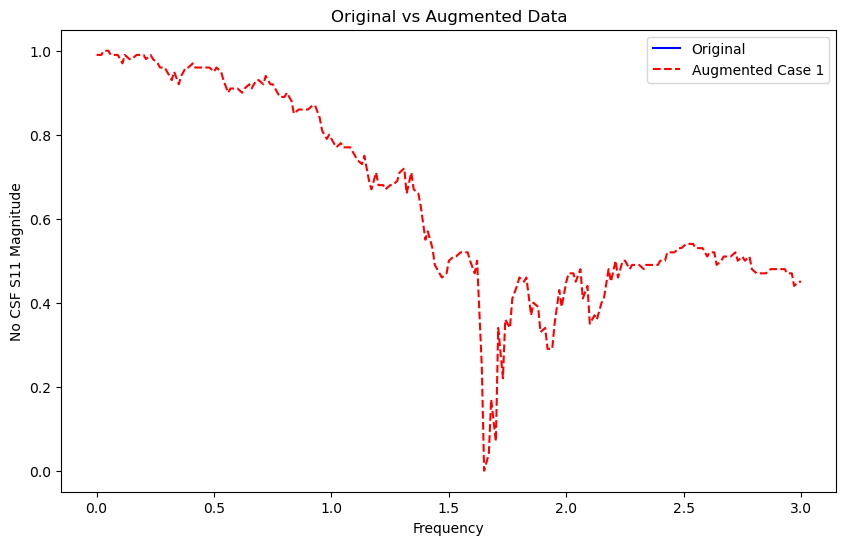

In [28]:
import matplotlib.pyplot as plt

# Assuming df_augmented is your DataFrame with 'Case' column and 'Frequency' as x-axis
original_data = combined_augmented_df[combined_augmented_df['Label'] == 'Exteme 1']
augmented_data_case1 = combined_augmented_df[combined_augmented_df['Label'] == 'Extreme 10']  # Example for one case

plt.figure(figsize=(10, 6))

# Plotting original data
plt.plot(original_data['Frequency'], original_data['226 mm^3 S11 Magnitude'], label='Original', linestyle='-', color='blue')

# Plotting augmented data for a case
plt.plot(augmented_data_case1['Frequency'], augmented_data_case1['226 mm^3 S11 Magnitude'], label='Augmented Case 1', linestyle='--', color='red')

plt.xlabel('Frequency')
plt.ylabel('No CSF S11 Magnitude')
plt.title('Original vs Augmented Data')
plt.legend()
plt.show()


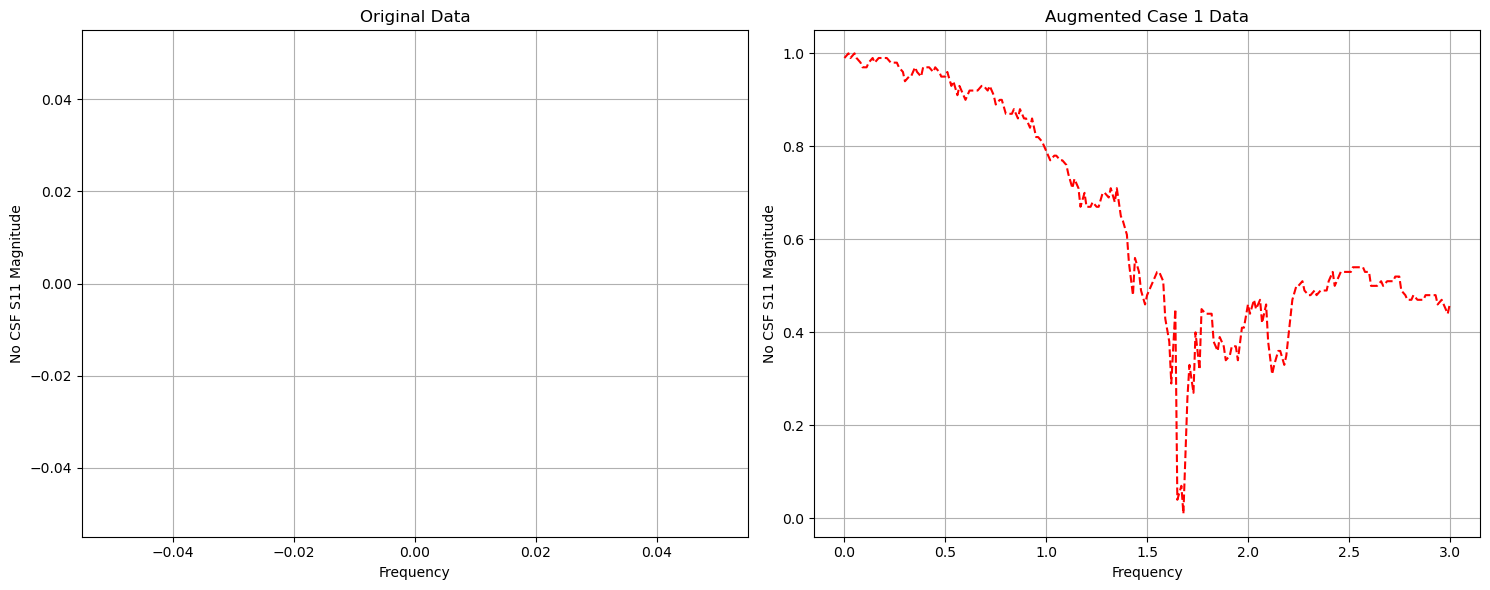

In [34]:
import matplotlib.pyplot as plt

# Assuming combined_augmented_df is your DataFrame with the necessary columns
# Isolating the specific datasets
original_data = combined_augmented_df[combined_augmented_df['Label'] == 'Exteme 1']
augmented_data_case1 = combined_augmented_df[combined_augmented_df['Label'] == 'Extreme 10']  # Example for one case

# Creating subplots to compare the original and augmented data separately
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting original data on the first subplot
axes[0].plot(original_data['Frequency'], original_data['226 mm^3 S11 Magnitude'], linestyle='-', color='blue')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('No CSF S11 Magnitude')
axes[0].set_title('Original Data')
axes[0].grid(True)

# Plotting augmented data for a case on the second subplot
axes[1].plot(augmented_data_case1['Frequency'], augmented_data_case1['226 mm^3 S11 Magnitude'], linestyle='--', color='red')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('No CSF S11 Magnitude')
axes[1].set_title('Augmented Case 1 Data')
axes[1].grid(True)

# Adjusting layout and showing the plots
plt.tight_layout()
plt.show()


The table you've provided shows a comparison between the original data and augmented case 1 across different metrics: mean, variance, t-statistic, and p-value. Both mean and variance values are identical (0.58 and 0.07, respectively), suggesting the augmented data closely matches the original data in terms of central tendency and dispersion. The t-statistic being 0 and the p-value being 1 indicate there's no statistical difference between the original and augmented data's means, reinforcing the similarity between the two datasets. This comparison suggests the augmentation process preserved key statistical properties effectively.

In [15]:
import pandas as pd

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["Mean", "Variance", "T-statistic", "P-value"],
    "Original": [
        round(original_mean, 2), 
        round(original_variance, 2), 
        round(t_stat, 2), 
        round(p_value, 2)
    ],
    "Augmented Case 1": [
        round(augmented_mean_case1, 2), 
        round(augmented_variance_case1, 2), 
        'N/A',  # T-statistic and P-value are only relevant for comparing groups
        'N/A'
    ]
})

# Display the comparison table
comparison_df




NameError: name 'original_mean' is not defined

## Fast Weighted Horizontal Visibility Graph (FWHVG)

The next step involves converting the normalized data into graphs using the Fast Weighted Horizontal Visibility Graph (FWHVG) method. This step is more complex and requires creating graphs from time series data. While a detailed implementation of the FWHVG algorithm might be extensive and requires custom coding, I'll provide a simplified outline to get you started with creating visibility graphs from your time series data using Python. We'll use the networkx library, which is great for creating and manipulating complex networks.
l.

Define the Horizontal Visibility Graph (HVG) algorithm:
We'll create a function to convert a single time series (a column from your dataset) into a graph. The FWHVG is a variant that includes weights, so we'll need to adapt the basic HVG concept to include edge weights.

Apply the function to your dataset:
We'll iterate over the columns of interest in your dataset and create a graph for each one.

Simplified HVG Algorithm Implementation
Here's a basic implementation to get you started. This example focuses on creating an unweighted graph for simplicity, but you can extend it to include weights based on your specific needs.

In [41]:
import networkx as nx
import numpy as np
# define a function to create a FWHVG from a series of data points. This function will be similar to the HVG creation function but will also calculate and assign weights to the edges.
def create_fwhvg(time_series):
    G = nx.Graph()
    n = len(time_series)
    
    # Add nodes
    for i in range(n):
        G.add_node(i, value=time_series[i])
    
    # Add weighted edges based on visibility
    for i in range(n):
        for j in range(i+1, n):
            visible = True
            max_height = -np.inf
            for k in range(i+1, j):
                if time_series[k] > time_series[i] + (time_series[j] - time_series[i]) * (k - i) / (j - i):
                    visible = False
                    break
                # Update max_height for weight calculation if needed
                max_height = max(max_height, time_series[k])
            if visible:
                # Calculate the weight; here, we simply use the difference in value as an example
                weight = abs(time_series[j] - time_series[i])
                G.add_edge(i, j, weight=weight)
    
    return G



Now, iterate through each condition's normalized dataset, select the appropriate data series for graph conversion (e.g., S11 magnitude), and use the create_fwhvg function to generate the graph.

In [42]:
fwhvg_graphs = {}

for condition, df in merged_conditions.items():
    # Example: Using S11 magnitude data for graph creation
    time_series = df[f'{condition} S11 Magnitude'].values
    graph = create_fwhvg(time_series)
    fwhvg_graphs[condition] = graph

    # Display basic information about the created graph
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    print(f"FWHVG for '{condition}' - Nodes: {num_nodes}, Edges: {num_edges}")


NameError: name 'merged_conditions' is not defined

## Extracting Graph Features
We'll extract the following features for each FWHVG:

1. Node Degree Distribution: Measures how many edges are connected to each node. The distribution of these degrees across the graph can indicate the variability or uniformity of connectivity. 


2. Average Path Length: The average number of steps along the shortest paths for all possible pairs of network nodes. It reflects the efficiency of information or signal transmission across the network.

3. Clustering Coefficient: Measures the degree to which nodes in a graph tend to cluster together. High clustering coefficients indicate a tendency for a graph to contain tightly knit grps.

4. Edge Weight Statistics: Includes mean, median, and standard deviation of edge weights, providing insights into the range and distribution of connection strengths in the graph.

In [ ]:
import numpy as np

# Initialize a dictionary to store the features for each condition
graph_features = {}

for condition, graph in fwhvg_graphs.items():
    features = {}
    
    # Node Degree Distribution
    degrees = [degree for node, degree in graph.degree()]
    features['degree_mean'] = np.mean(degrees)
    features['degree_std'] = np.std(degrees)
    
    # Average Path Length (for connected components)
    if nx.is_connected(graph):
        features['average_path_length'] = nx.average_shortest_path_length(graph)
    else:
        # Compute for the largest connected component if the graph is not fully connected
        largest_cc = max(nx.connected_components(graph), key=len)
        subgraph = graph.subgraph(largest_cc)
        features['average_path_length'] = nx.average_shortest_path_length(subgraph)
    
    # Clustering Coefficient
    features['clustering_coefficient'] = nx.average_clustering(graph)
    
    # Edge Weight Statistics
    edge_weights = [data['weight'] for u, v, data in graph.edges(data=True)]
    features['weight_mean'] = np.mean(edge_weights)
    features['weight_median'] = np.median(edge_weights)
    features['weight_std'] = np.std(edge_weights)
    
    graph_features[condition] = features

# Display extracted features for one of the conditions to verify the process
print(graph_features['No CSF'])



At this stage, after extracting graph-theoretical features from the Fast Weighted Horizontal Visibility Graphs (FWHVG) for each condition, the next logical step is to use these features for analysis or classification. This involves either statistical analysis to identify significant differences between conditions or employing machine learning models to classify the conditions based on the extracted features

## Statistical Analysis
A preliminary step could involve statistical analysis to compare the extracted features across different conditions. This can help identify which features significantly differ between conditions, suggesting a potential for distinguishing between stages of Alzheimer's Disease (AD). Techniques like ANOVA (for comparing means across more than two groups) or pairwise t-tests (for comparing means between two groups) can be useful here.
features:
.

In [ ]:
import pandas as pd

# Convert the graph_features dictionary to a DataFrame
features_df = pd.DataFrame.from_dict(graph_features, orient='index')

# Resetting the index to make 'Condition' a column in the DataFrame
features_df.reset_index(inplace=True)
features_df.rename(columns={'index': 'Condition'}, inplace=True)

# Display the DataFrame for comparison
# Round the numerical values to 2 decimal places for better readability
features_df_rounded = features_df.round(2)

# Display the rounded DataFrame
features_df_rounded



In [ ]:
# # Export to CSV
# features_df_rounded.to_csv('features_comparison.csv', index=False)

# # Export to Excel
# features_df_rounded.to_excel('features_comparison.xlsx', index=False)


In [ ]:


# Convert the graph_features dictionary to a DataFrame
features_df = pd.DataFrame.from_dict(graph_features, orient='index').reset_index()
features_df.rename(columns={'index': 'Condition'}, inplace=True)

# Now, `features_df` is ready for statistical analysis
print(features_df.head())



In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Conducting ANOVA for the 'degree_mean' feature across conditions
model = ols('degree_mean ~ C(Condition)', data=features_df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'degree_mean' is the feature of interest and 'Condition' is the column indicating the condition
posthoc = pairwise_tukeyhsd(features_df['degree_mean'], features_df['Condition'], alpha=0.05)
print(posthoc)


## Machine Learning Classification
For classification, we can use the extracted features as input to a machine learning model. Given the nature of the data, a few models that might be suitable include:
Support Vector Machines (SVM): Effective for high-dimensional data and can be fine-tuned for better performance.
Random Forest Classifier: Provides a good baseline due to its simplicity, effectiveness, and ability to handle non-linear data.
Gradient Boosting Machines (GBM): Can offer improved accuracy through ensemble learning but may require more parameter tuning.
Here's a basic outline of using a Random Forest Classifier with scikit-learn, assuming graph_features is a dictionary where keys are conditions and values are dictionaries of the extracted features:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Convert graph_features into a DataFrame
features_df = pd.DataFrame.from_dict(graph_features, orient='index')

# Assuming you have a target array `y` that corresponds to the conditions encoded as integers
X = features_df.values
y = features_df.index.map({'No CSF': 0, '22.6 mm^3': 1, '56.5 mm^3': 2, '113 mm^3': 3, '226 mm^3': 4}).values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
